In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/shaurya project/deliveries.csv')
data = pd.read_csv('/content/drive/MyDrive/shaurya project/matches.csv')

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
kohli_scores = df[df['batter'] == "V Kohli"]
kohli_matchwise_score = kohli_scores.groupby('match_id')['batsman_runs'].sum().reset_index()
kohli_matchwise_score_sub = kohli_matchwise_score.head(20)
kohli_matchwise_score_sub

#prepare data for ARIMA
kohli_matchwise_score_sub["match_number"] = range(len(kohli_matchwise_score_sub))
kohli_matchwise_score_sub.set_index("match_number", inplace=True)

#fit ARIMA model
model = ARIMA(kohli_matchwise_score_sub["batsman_runs"], order=(1,1,1))
model_fit = model.fit()

#forcast
forecast = model_fit.forecast(steps=10)
print(forecast)

20    17.174989
21    16.235951
22    16.641375
23    16.466336
24    16.541908
25    16.509280
26    16.523367
27    16.517285
28    16.519911
29    16.518777
Name: predicted_mean, dtype: float64


<ipython-input-61-441f3d838f88>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_matchwise_score_sub["match_number"] = range(len(kohli_matchwise_score_sub))


Mean Absolute Error (MAE):  25.49455584853502
Root Mean Squared Error (RMSE):  32.40336358037994


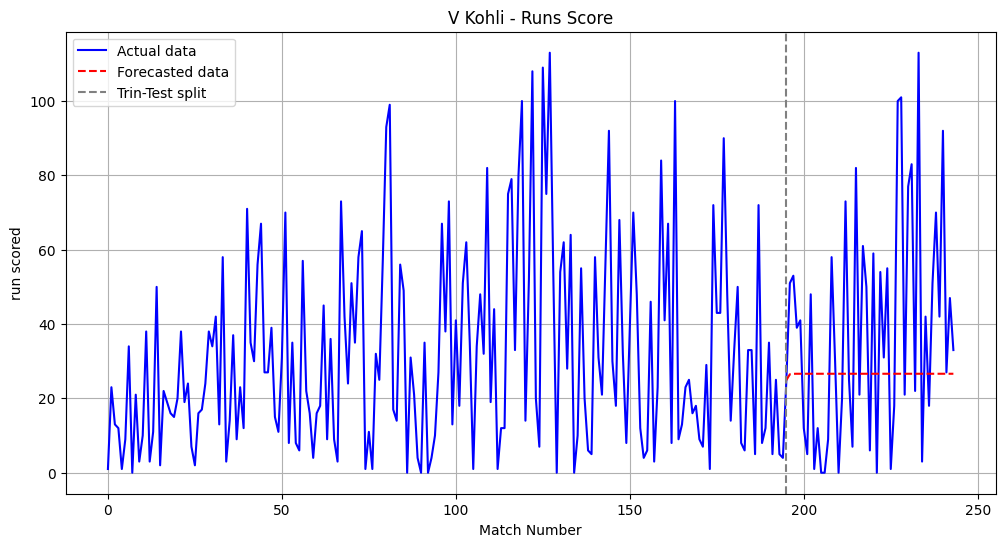

In [ ]:
time_series = kohli_matchwise_score['batsman_runs']
adf_result = adfuller(time_series)

if adf_result[1] >0.05:
  time_series_diff = time_series.diff().dropna()
else:
  time_series_diff = time_series

train_size = int(len(time_series) * 0.8)  # Adjust the split ratio as needed
train, test = time_series[0:train_size], time_series[train_size:len(time_series)]

model = ARIMA(train , order =(1,1,1))
fitted_model = model.fit()

forecast  = fitted_model.forecast(steps =len(test))
forecast.index =test.index
forecast.head(5)

#test = kohli_matchwise_score.head(10)['batsman_runs']
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): ",mae )
rmse  = np.sqrt(np.mean((actual_runs - forecast_runs)**2))
print(f"Root Mean Squared Error (RMSE): ",rmse )

plt.figure(figsize = (12, 6))
plt.plot(time_series_diff, label ="Actual data", color ="blue")
plt.plot(forecast ,label ="Forecasted data" , color="red", linestyle ="--")
plt.axvline(x =test.index[0], color="gray", linestyle = "--",label = "Trin-Test split")
plt.title("V Kohli - Runs Score")
plt.xlabel("Match Number")
plt.ylabel("run scored")
plt.legend()
plt.grid()
plt.show()


In [ ]:
total_runs = df.groupby('batter')['batsman_runs'].sum().reset_index()
total_runs = total_runs.sort_values(by='batsman_runs', ascending=False)
top_10_batsman = total_runs.head(10)
print(top_10_batsman)

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


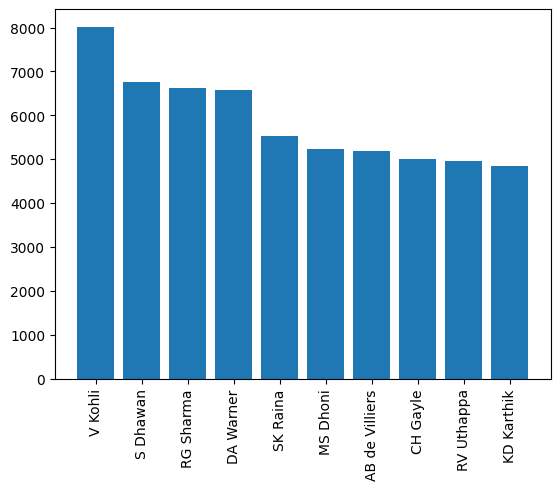

In [ ]:
xpts = np.array(top_10_batsman['batter'])
ypts = np.array(top_10_batsman['batsman_runs'])
plt.bar(xpts, ypts)
plt.xticks(rotation=90)
plt.show()

In [ ]:
model = ARIMA(top_10_batsman['batsman_runs'], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

In [ ]:
forecast = model_fit.forecast(steps=10)
print(forecast)

10    4842.829538
11    4842.997889
12    4842.831623
13    4842.995829
14    4842.833657
15    4842.993821
16    4842.835641
17    4842.991862
18    4842.837575
19    4842.989951
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
df.set_index('batter', inplace=True)

In [ ]:
bowler_data = df.groupby(['match_id', 'bowler', 'is_wicket', 'total_runs'])
performance = df.groupby(['match_id', 'bowler']).agg(
    wickets = ('is_wicket', 'sum'),
    runs_conceded = ('total_runs', 'sum')
).reset_index()
performance
bowler_summary = performance.groupby('bowler').agg(
    wickets = ('wickets', 'sum'),
    total_runs_conceded = ('runs_conceded', 'sum'),
    matches_played = ('match_id', 'nunique')
).reset_index()
top_bowlers = bowler_summary.sort_values(by='wickets', ascending=False)
top_10_bowlers = top_bowlers.head(10)
top_10_bowlers

,bowler,wickets,total_runs_conceded,matches_played
524,YS Chahal,213,4681,159
119,DJ Bravo,207,4436,158
348,PP Chawla,201,5179,191
446,SP Narine,200,4672,175
355,R Ashwin,198,5435,208
71,B Kumar,195,5051,176
438,SL Malinga,188,3486,122
8,A Mishra,183,4193,162
193,JJ Bumrah,182,3840,133
373,RA Jadeja,169,4917,211


In [ ]:
model = ARIMA(top_10_bowlers['wickets'], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

In [ ]:
forecast = model_fit.forecast(steps=10)
print(forecast)

10    164.437552
11    159.875164
12    155.312837
13    150.750570
14    146.188364
15    141.626219
16    137.064133
17    132.502109
18    127.940144
19    123.378241
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


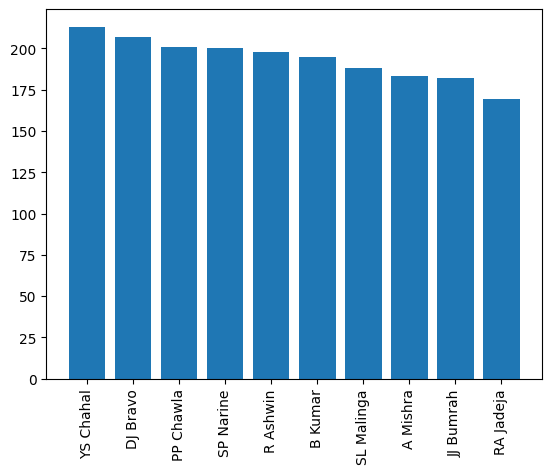

In [ ]:

import numpy as np
xpts = np.array(top_10_bowlers['bowler'])
ypts = np.array(top_10_bowlers['wickets'])
plt.bar(xpts, ypts)
plt.xticks(rotation=90)
plt.show()

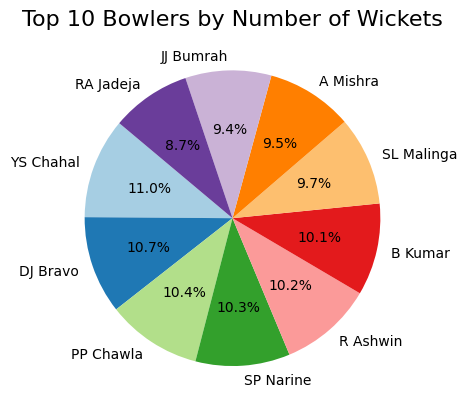

In [ ]:
plt.pie(top_10_bowlers['wickets'], labels=top_10_bowlers['bowler'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Bowlers by Number of Wickets', fontsize=16)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

total_runs = df.groupby('batter')['batsman_runs'].sum().reset_index()
total_runs = total_runs.sort_values(by='batsman_runs', ascending=False)
top_10_batsman = total_runs.head(10)
print(top_10_batsman)


p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

model = SARIMAX(top_10_batsman['batsman_runs'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)
print(model_fit.summary())

predicted_values = model_fit.predict(start=0,  # Start at the beginning of the data
                                         end=len(top_10_batsman) + 9,  # Predict 10 steps ahead
                                         dynamic=False)
print(predicted_values)

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843
                                     SARIMAX Results                                      
Dep. Variable:                       batsman_runs   No. Observations:                   10
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sat, 21 Dec 2024   AIC                             10.000
Time:                                    16:36:07   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 10                               

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

In [ ]:
# Set the minimum run threshold
min_run_threshold = 300

# Group by batsman to calculate total runs and balls faced
batsman_stats = df.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('batter', 'count')  # Count the number of deliveries faced
).reset_index()

# Filter batsmen with total runs >= minimum threshold
filtered_batsmen = batsman_stats[batsman_stats['total_runs'] >= min_run_threshold]

# Calculate strike rate
filtered_batsmen['strike_rate'] = (filtered_batsmen['total_runs'] / filtered_batsmen['balls_faced']) * 100

# Sort the batsmen by strike rate in descending order and take the top 10
top_10_batsmen = filtered_batsmen.sort_values(by='strike_rate', ascending=False).head(10)
top_10_batsmen

<ipython-input-73-cdc4c3308038>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_batsmen['strike_rate'] = (filtered_batsmen['total_runs'] / filtered_batsmen['balls_faced']) * 100


,batter,total_runs,balls_faced,strike_rate
234,J Fraser-McGurk,330,150,220.000000
433,PD Salt,653,385,169.610390
606,T Stubbs,405,239,169.456067
617,TM Head,772,458,168.558952
39,AD Russell,2488,1515,164.224422
208,H Klaasen,993,613,161.990212
612,TH David,659,417,158.033573
561,SP Narine,1534,984,155.894309
585,Shashank Singh,423,272,155.514706
396,N Pooran,1769,1143,154.768154


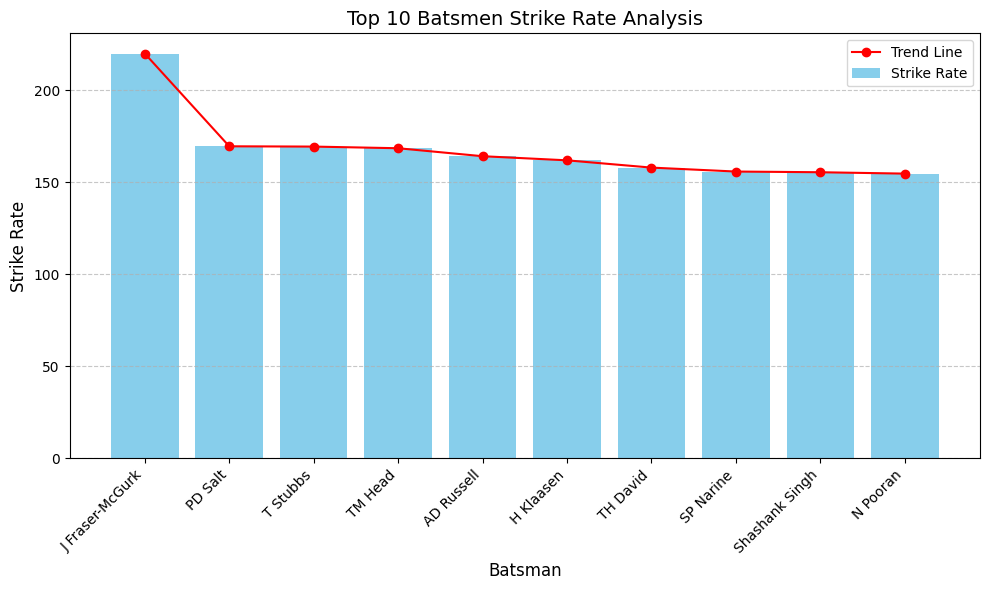

In [ ]:
# Plot the bar and line chart
plt.figure(figsize=(10, 6))

# Bar chart for strike rate
plt.bar(top_10_batsmen['batter'], top_10_batsmen['strike_rate'], color='skyblue', label='Strike Rate')

# Line plot overlay
plt.plot(top_10_batsmen['batter'], top_10_batsmen['strike_rate'], color='red', marker='o', linestyle='-', label='Trend Line')

# Add titles and labels
plt.title('Top 10 Batsmen Strike Rate Analysis', fontsize=14)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Show gridlines for better clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Group by bowler to calculate total runs conceded and total balls bowled
bowler_stats = df.groupby('bowler').agg(
    total_runs_conceded=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    total_balls_bowled=pd.NamedAgg(column='ball', aggfunc='sum')
).reset_index()

# Filter out bowlers who have bowled fewer than 1000 balls
bowler_stats = bowler_stats[bowler_stats['total_balls_bowled'] >= 1000]

bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / (bowler_stats['total_balls_bowled'] / 6) #Economy rate
top_10_economy_bowlers = bowler_stats.sort_values(by='economy_rate').head(10) #Sort the bowlers by economy rate in ascending order
print(top_10_economy_bowlers)


               bowler  total_runs_conceded  total_balls_bowled  economy_rate
263    M Muralitharan                 1765                5720      1.851399
138          DW Steyn                 2583                8338      1.858719
7            A Kumble                 1089                3488      1.873280
147        GD McGrath                  366                1169      1.878529
181           J Yadav                  447                1422      1.886076
377  RE van der Merwe                  515                1635      1.889908
265       M Pathirana                  617                1948      1.900411
446         SP Narine                 4672               14728      1.903313
132         DP Nannes                  815                2569      1.903464
363         R Rampaul                  319                1005      1.904478


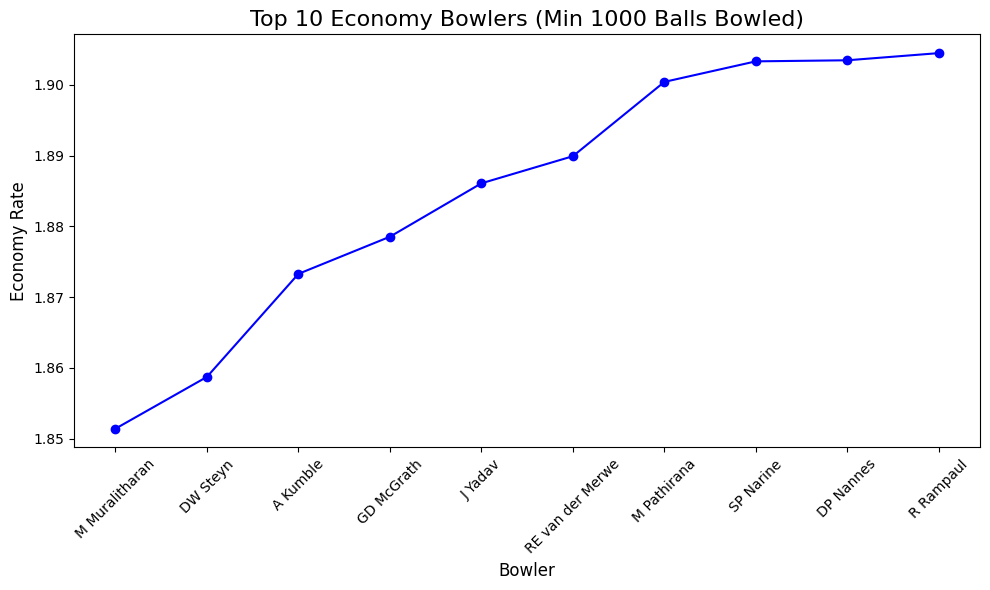

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_economy_bowlers['bowler'], top_10_economy_bowlers['economy_rate'], marker='o', linestyle='-', color='b')
plt.title('Top 10 Economy Bowlers (Min 1000 Balls Bowled)', fontsize=16)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Economy Rate', fontsize=12)
plt.xticks(rotation=45) #for better readability
plt.tight_layout()
plt.show()

<ipython-input-77-61bda3fa709b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_inning_stats['bowling_average'].replace([float('inf'), None], 0, inplace=True)


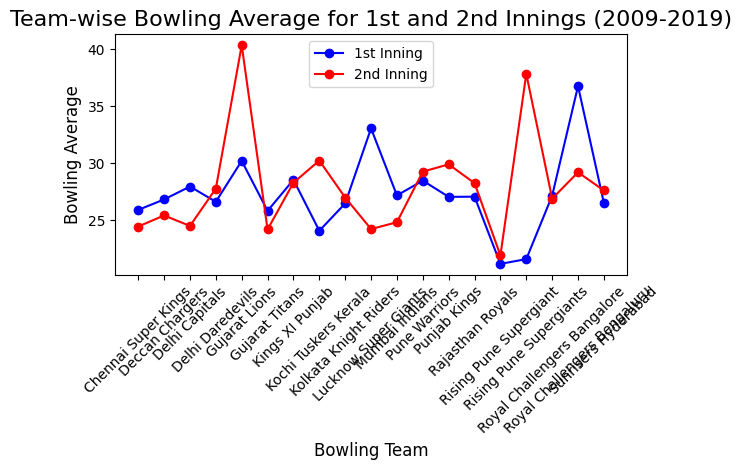

In [ ]:
# Group by both 'bowling_team' and 'inning' to calculate total runs conceded and wickets taken for each
team_inning_stats = df.groupby(['bowling_team', 'inning']).agg(
    total_runs_conceded=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    total_wickets=pd.NamedAgg(column='is_wicket', aggfunc='sum')
).reset_index()

team_inning_stats['bowling_average'] = team_inning_stats['total_runs_conceded'] / team_inning_stats['total_wickets']
team_inning_stats['bowling_average'].replace([float('inf'), None], 0, inplace=True)

# Separate data for 1st and 2nd innings
first_innings = team_inning_stats[team_inning_stats['inning'] == 1]
second_innings = team_inning_stats[team_inning_stats['inning'] == 2]

# Plotting 1st innings
plt.plot(first_innings['bowling_team'], first_innings['bowling_average'], marker='o', linestyle='-', color='b', label='1st Inning')

# Plotting 2nd innings
plt.plot(second_innings['bowling_team'], second_innings['bowling_average'], marker='o', linestyle='-', color='r', label='2nd Inning')

plt.title('Team-wise Bowling Average for 1st and 2nd Innings (2009-2019)', fontsize=16)
plt.xlabel('Bowling Team', fontsize=12)
plt.ylabel('Bowling Average', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-78-069526f019e2>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_inning_stats['batting_average'].replace([float('inf'), None], 0, inplace=True)


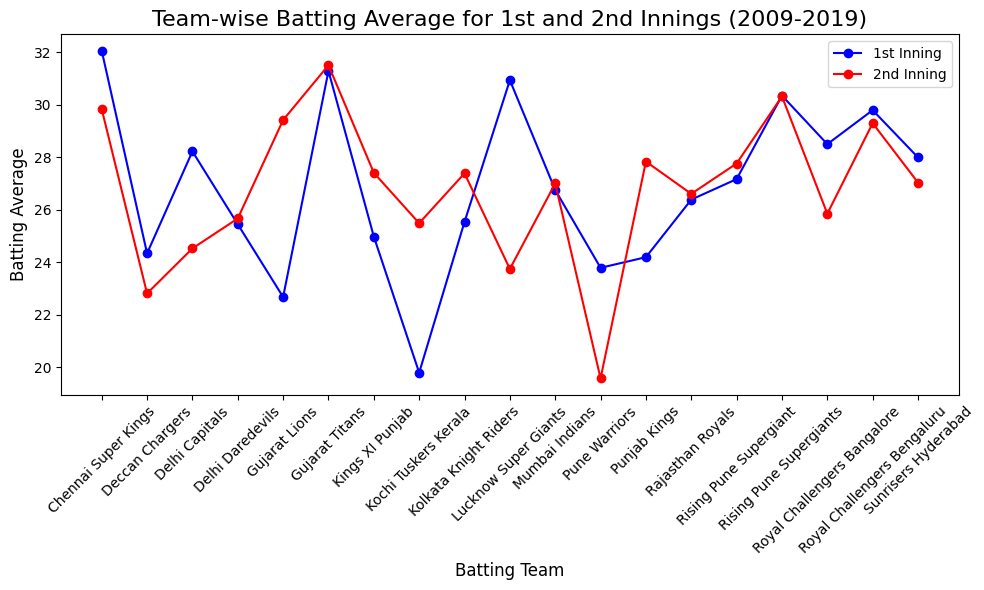

In [ ]:
# Group by both 'batting_team' and 'inning' to calculate total runs scored and total wickets lost for each
team_inning_stats = df.groupby(['batting_team', 'inning']).agg(
    total_runs_scored=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    total_wickets_lost=pd.NamedAgg(column='is_wicket', aggfunc='sum')
).reset_index()

# Calculate the batting average for each team in each inning
team_inning_stats['batting_average'] = team_inning_stats['total_runs_scored'] / team_inning_stats['total_wickets_lost']

# Handling case where no wickets were lost to avoid division by zero (setting batting average to 0)
team_inning_stats['batting_average'].replace([float('inf'), None], 0, inplace=True)

# Separate data for 1st and 2nd innings
first_innings = team_inning_stats[team_inning_stats['inning'] == 1]
second_innings = team_inning_stats[team_inning_stats['inning'] == 2]

plt.figure(figsize=(10, 6))
# Plotting 1st innings
plt.plot(first_innings['batting_team'], first_innings['batting_average'], marker='o', linestyle='-', color='b', label='1st Inning')

# Plotting 2nd innings
plt.plot(second_innings['batting_team'], second_innings['batting_average'], marker='o', linestyle='-', color='r', label='2nd Inning')

plt.title('Team-wise Batting Average for 1st and 2nd Innings (2009-2019)', fontsize=16)
plt.xlabel('Batting Team', fontsize=12)
plt.ylabel('Batting Average', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
##Batting Score: Weighted sum of total runs (60%) and strike rate (40%).

#Bowling Score: Weighted sum of wickets (10 points each) and economy rate (penalized with -5 points).

#Fielding Score:Catches: 5 points each.
                #Run-outs: 7 points each.
#Overall Score: Combines batting (50%), bowling (40%), and fielding (10%) scores.


# Batting Performance
batting_stats = df.groupby('batter').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    balls_faced=pd.NamedAgg(column='ball', aggfunc='count')
).reset_index()

batting_stats['strike_rate'] = (batting_stats['total_runs'] / batting_stats['balls_faced']) * 100
batting_stats['batting_score'] = batting_stats['total_runs'] * 0.6 + batting_stats['strike_rate'] * 0.4

# Bowling Performance
bowling_stats = df.groupby('bowler').agg(
    total_wickets=pd.NamedAgg(column='is_wicket', aggfunc='sum'),
    runs_conceded=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    balls_bowled=pd.NamedAgg(column='ball', aggfunc='count')
).reset_index()

bowling_stats['economy_rate'] = (bowling_stats['runs_conceded'] / (bowling_stats['balls_bowled'] / 6))
bowling_stats['bowling_score'] = bowling_stats['total_wickets'] * 10 - bowling_stats['economy_rate'] * 5

# Fielding Performance
fielding_stats = df.groupby('fielder').agg(
    total_catches=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: (x == 'caught').sum()),
    total_run_outs=pd.NamedAgg(column='dismissal_kind', aggfunc=lambda x: (x == 'run out').sum())
).reset_index()

fielding_stats['fielding_score'] = fielding_stats['total_catches'] * 5 + fielding_stats['total_run_outs'] * 7

# Merge all stats into a single DataFrame
all_rounder_stats = pd.merge(batting_stats[['batter', 'batting_score']],
                             bowling_stats[['bowler', 'bowling_score']],
                             left_on='batter', right_on='bowler', how='outer')

all_rounder_stats = pd.merge(all_rounder_stats,
                             fielding_stats[['fielder', 'fielding_score']],
                             left_on='batter', right_on='fielder', how='outer')

# Fill NaN values with 0
all_rounder_stats.fillna(0, inplace=True)

# Calculate Overall All-Rounder Score
all_rounder_stats['all_rounder_score'] = (
    all_rounder_stats['batting_score'] * 0.5 +
    all_rounder_stats['bowling_score'] * 0.4 +
    all_rounder_stats['fielding_score'] * 0.1
)

# Top 10 All-Rounders
top_all_rounders = all_rounder_stats.sort_values(by='all_rounder_score', ascending=False).head(10)
print(top_all_rounders)

             batter  batting_score     bowler  bowling_score         fielder  \
662         V Kohli    4859.804747    V Kohli       7.840909         V Kohli   
499       RG Sharma    4029.167278  RG Sharma     120.286533       RG Sharma   
534        S Dhawan    4110.781725   S Dhawan      -4.081633        S Dhawan   
156       DA Warner    3994.371994  DA Warner     -30.000000       DA Warner   
570        SK Raina    3374.614125   SK Raina     263.258065        SK Raina   
389        MS Dhoni    3198.934026          0       0.000000        MS Dhoni   
30   AB de Villiers    3168.032177          0       0.000000  AB de Villiers   
492       RA Jadeja    1825.172918  RA Jadeja    1652.128370       RA Jadeja   
589       SR Watson    2381.665284  SR Watson    1031.506785       SR Watson   
131        CH Gayle    3055.048692   CH Gayle     151.215753        CH Gayle   

     fielding_score  all_rounder_score  
662           689.0        2501.938737  
499           577.0        2120.39825

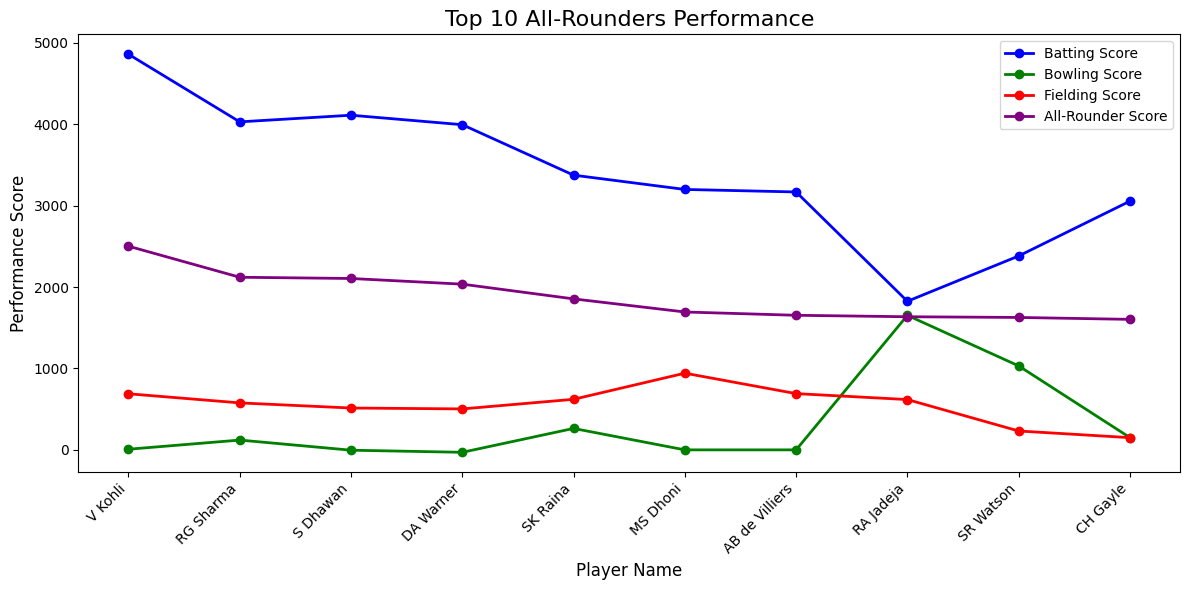

In [ ]:
# Assuming top_all_rounders is the dataframe containing the top 10 all-rounders
# Create a new dataframe with only the necessary columns
top_all_rounders = top_all_rounders[['batter', 'batting_score', 'bowling_score', 'fielding_score', 'all_rounder_score']]

# Plotting the line chart
plt.figure(figsize=(12, 6))

# Plot each performance category as a separate line
plt.plot(top_all_rounders['batter'], top_all_rounders['batting_score'], marker='o', label='Batting Score', color='blue', linestyle='-', linewidth=2)
plt.plot(top_all_rounders['batter'], top_all_rounders['bowling_score'], marker='o', label='Bowling Score', color='green', linestyle='-', linewidth=2)
plt.plot(top_all_rounders['batter'], top_all_rounders['fielding_score'], marker='o', label='Fielding Score', color='red', linestyle='-', linewidth=2)
plt.plot(top_all_rounders['batter'], top_all_rounders['all_rounder_score'], marker='o', label='All-Rounder Score', color='purple', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('Top 10 All-Rounders Performance', fontsize=16)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)

# Rotate player names on x-axis for better visibility
plt.xticks(rotation=45, ha='right')

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Group by 'player_of_match' and count the number of awards
man_of_the_match_stats = data.groupby('player_of_match').size().reset_index(name='awards_count')
man_of_the_match_stats

,player_of_match,awards_count
0,A Chandila,1
1,A Kumble,3
2,A Manohar,1
3,A Mishra,12
4,A Nehra,6
...,...,...
286,YK Pathan,16
287,YS Chahal,6
288,Yash Thakur,1
289,Yuvraj Singh,5


In [ ]:
# Step 2: Sort by the number of awards in descending order
top_players = man_of_the_match_stats.sort_values(by='awards_count', ascending=False).head(15)
top_players

,player_of_match,awards_count
11,AB de Villiers,25
43,CH Gayle,22
214,RG Sharma,19
53,DA Warner,18
276,V Kohli,18
165,MS Dhoni,17
252,SR Watson,16
286,YK Pathan,16
209,RA Jadeja,16
16,AD Russell,15


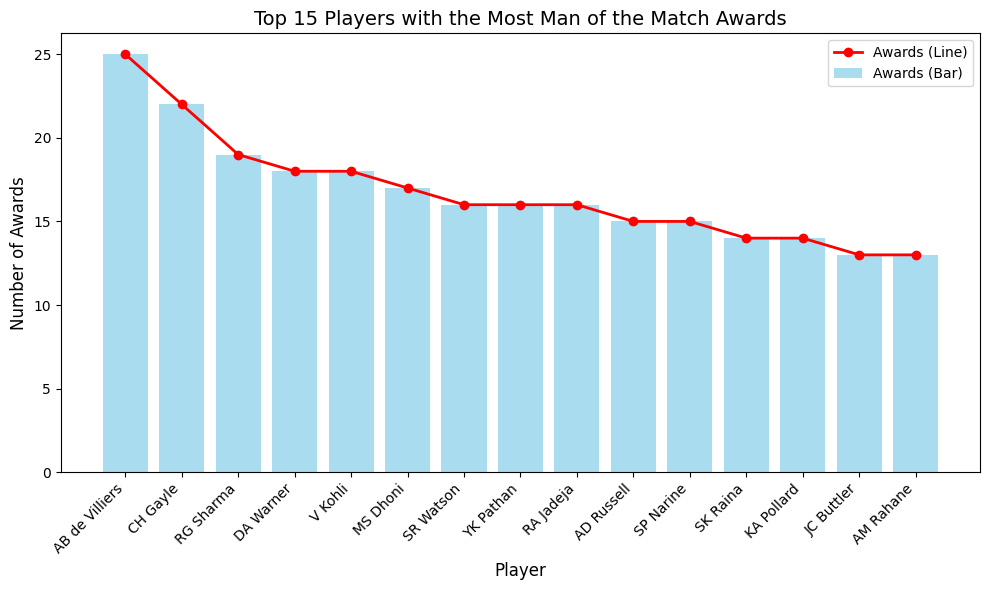

In [ ]:
# Step 3: combined bar and line chart
plt.figure(figsize=(10, 6))

# Bar Chart
plt.bar(top_players['player_of_match'], top_players['awards_count'], color='skyblue', alpha=0.7, label='Awards (Bar)')

# Line Chart
plt.plot(top_players['player_of_match'], top_players['awards_count'], color='red', marker='o', label='Awards (Line)', linewidth=2)

# Add labels and title
plt.title("Top 15 Players with the Most Man of the Match Awards", fontsize=14)
plt.xlabel("Player", fontsize=12)
plt.ylabel("Number of Awards", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()